# $$\text{Temperature Forecast in Algeria}$$

In [182]:
from fbprophet import *
import pandas as pd
import numpy as np
import networkx as nx
import datetime
import json
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

## Introduction:

This report gathers temperature data from 52 stations in Algeria, each station has a different timeline with an earliest measurment taken in January 1880. The data point represent the monthly average temperature.

```Source:``` GISS Surface Temperature Analysis (v4) Based on GHCN data from NOAA-NCEI.

```Citation:``` Menne, M.J., I. Durre, B. Korzeniewski, S. McNeal, K. Thomas, X. Yin, S. Anthony, R. Ray, 
R.S. Vose, B.E.Gleason, and T.G. Houston, 2012: Global Historical Climatology Network - 
Daily (GHCN-Daily), Version 3. [indicate subset used following decimal, 
e.g. Version 3.12]. 
NOAA National Climatic Data Center. http://doi.org/10.7289/V5D21VHZ

In [288]:
stations = [
    {'Station Name': 'Bordj Badj Mokhtar',
    'ID': 'AGM00060686',
    'Lat': 21.3330,
    'Lon': 0.9500,
    'Elevation': 399.0,
    'BI': 8},
    {'Station Name': 'Tamanrasset',
    'ID': 'AG000060680',
    'Lat': 22.8000,
    'Lon': 5.4331,
    'Elevation': 1362.0,
    'BI': 0},
    {'Station Name': 'Tiska',
    'ID': 'AGM00060670',
    'Lat': 24.2930,
    'Lon': 9.4520,
    'Elevation': 968.0,
    'BI': 0},
    {'Station Name': 'Illizi Takhamalt',
    'ID': 'AGM00060640',
    'Lat': 26.7240,
    'Lon': 8.6230,
    'Elevation': 541.9,
    'BI': 0},
    {'Station Name': 'In Salah',
    'ID': 'AGM00060630',
    'Lat': 27.2330,
    'Lon': 2.5000,
    'Elevation': 269.0,
    'BI': 14},
    {'Station Name': 'Touat Cheikh Sidi Mohamed Bel',
    'ID': 'AGM00060620',
    'Lat': 27.8380,
    'Lon': -0.1860,
    'Elevation': 280.1,
    'BI': 0},
    {'Station Name': 'Tindouf',
    'ID': 'AGM00060656',
    'Lat': 27.7000,
    'Lon': -8.1670,
    'Elevation': 442.9,
    'BI': 0},
    {'Station Name': 'Timimoun',
    'ID': 'AGM00060607',
    'Lat': 29.2370,
    'Lon': 0.2760,
    'Elevation': 313.0,
    'BI': 0},
    {'Station Name': 'Beni Abbes',
    'ID': 'AGM00060602',
    'Lat': 30.1330,
    'Lon': -2.1670,
    'Elevation': 505.0,
    'BI': 10},
    {'Station Name': 'El Golea',
    'ID': 'AG000060590',
    'Lat': 30.5667,
    'Lon': 2.8667,
    'Elevation': 397.0,
    'BI': 12},
    {'Station Name': 'Bechar',
    'ID': 'AGM00060571',
    'Lat': 31.6460,
    'Lon': -2.2700,
    'Elevation': 811.1,
    'BI': 9},
    {'Station Name': 'Oued Irara',
    'ID': 'AGM00060581',
    'Lat': 31.6730,
    'Lon': 6.1400,
    'Elevation': 141.1,
    'BI': 34},
    {'Station Name': 'Ouargla',
    'ID': 'AGM00060580',
    'Lat': 31.9170,
    'Lon': 5.4130,
    'Elevation': 150.0,
    'BI': 14},
    {'Station Name': 'Noumerat',
    'ID': 'AGM00060566',
    'Lat': 32.3840,
    'Lon': 3.7940,
    'Elevation': 460.9,
    'BI': 8},
    {'Station Name': 'Sidi Mahdi',
    'ID': 'AGM00060555',
    'Lat': 33.0680,
    'Lon': 6.0890,
    'Elevation': 85.0,
    'BI': 6},
    {'Station Name': 'Guemar',
    'ID': 'AGM00060559',
    'Lat': 33.5110,
    'Lon': 6.7770,
    'Elevation': 61.9,
    'BI': 11},
    {'Station Name': 'Naama',
    'ID': 'AGM00060557',
    'Lat': 33.2670,
    'Lon': -0.3000,
    'Elevation': 1166.0,
    'BI': 17},    
    {'Station Name': 'Mecheria',
    'ID': 'AGM00060549',
    'Lat': 33.5360,
    'Lon': -0.2420,
    'Elevation': 1175.0,
    'BI': 16},
    {'Station Name': 'El Bayadh',
    'ID': 'AGM00060550',
    'Lat': 33.6670,
    'Lon': 1.0000,
    'Elevation': 1347.0,
    'BI': 16},
    
    {'Station Name': 'Laghouat',
    'ID': 'AGE00147719',
    'Lat': 33.7997,
    'Lon': 2.8900,
    'Elevation': 767.0,
    'BI': 19},
    
    {'Station Name': 'El Kheiter',
    'ID': 'AGM00060540',
    'Lat': 34.1500,
    'Lon': 0.0670,
    'Elevation': 1001.0,
    'BI': 0},
    {'Station Name': 'Djelfa Tletsi',
    'ID': 'AGM00060535',
    'Lat': 34.6830,
    'Lon': 3.2500,
    'Elevation': 1144.0,
    'BI': 32},
    {'Station Name': 'Biskra',
    'ID': 'AGE00147718',
    'Lat': 34.8500,
    'Lon': 5.7200,
    'Elevation': 125.0,
    'BI': 38},
    {'Station Name': 'Saida',
    'ID': 'AGM00060536',
    'Lat': 34.8670,
    'Lon': 0.1500,
    'Elevation': 752.0,
    'BI': 20},
    {'Station Name': 'Ghriss',
    'ID': 'AGM00060507',
    'Lat': 35.2080,
    'Lon': 0.1470,
    'Elevation': 513.9,
    'BI': 0},
    {'Station Name': 'Mostaganem',
    'ID': 'AGM00060457',
    'Lat': 35.8830,
    'Lon': 0.1170,
    'Elevation': 138.0,
    'BI': 10},
    {'Station Name': 'Arzew',
    'ID': 'AGM00060452',
    'Lat': 35.8170,
    'Lon': -0.2670,
    'Elevation': 4.0,
    'BI': 188},
    {'Station Name': 'Es Senia',
    'ID': 'AGM00060490',
    'Lat': 35.6240,
    'Lon': -0.6210,
    'Elevation': 89.9,
    'BI': 14},
    {'Station Name': 'Beni Saf',
    'ID': 'AGM00060518',
    'Lat': 35.3000,
    'Lon': -1.3500,
    'Elevation': 70.0,
    'BI': 10},
    {'Station Name': 'Zenata',
    'ID': 'AGM00060531',
    'Lat': 35.0170,
    'Lon': -1.4500,
    'Elevation': 248.1,
    'BI': 7},
    {'Station Name': 'Maghnia',
    'ID': 'AGM00060522',
    'Lat': 34.8200,
    'Lon': -1.7700,
    'Elevation': 426.0,
    'BI': 0},
    {'Station Name': 'Ksar Chellala',
    'ID': 'AGM00060514',
    'Lat': 35.1670,
    'Lon': 2.3170,
    'Elevation': 801.0,
    'BI': 0},
    {'Station Name': 'Bou Chekif',
    'ID': 'AGM00060511',
    'Lat': 35.3410,
    'Lon': 1.4630,
    'Elevation': 989.1,
    'BI': 0},
    {'Station Name': 'Ech Cheliff',
    'ID': 'AGM00060425',
    'Lat': 36.2130,
    'Lon': 1.3320,
    'Elevation': 141.1,
    'BI': 10},
    {'Station Name': 'Miliana',
    'ID': 'AGM00060430',
    'Lat': 36.3000,
    'Lon': 2.2330,
    'Elevation': 721.0,
    'BI': 11},
    {'Station Name': 'Medea',
    'ID': 'AGM00060437',
    'Lat': 36.2830,
    'Lon': 2.7330,
    'Elevation': 1036.0,
    'BI': 21},
    {'Station Name': 'Ain Bessam',
    'ID': 'AGM00060415',
    'Lat': 36.3170,
    'Lon': 3.5330,
    'Elevation': 748.0,
    'BI': 0},
    {'Station Name': 'Alger Dar El Beida',
    'ID': 'AG000060390',
    'Lat': 36.7167,
    'Lon': 3.2500,
    'Elevation': 24.0,
    'BI': 25},
    {'Station Name': 'Bou Saada',
    'ID': 'AGM00060515',
    'Lat': 35.3330,
    'Lon': 4.2060,
    'Elevation': 459.0,
    'BI': 0},
    {'Station Name': "M'Sila",
    'ID': 'AGM00060467',
    'Lat': 35.6670,
    'Lon': 4.5000,
    'Elevation': 442.0,
    'BI': 9},
    {'Station Name': 'Bordj Bou Arreridj',
    'ID': 'AGM00060444',
    'Lat': 36.0670,
    'Lon': 4.7670,
    'Elevation': 930.0,
    'BI': 29},
    {'Station Name': 'Setif Ain Arnat',
    'ID': 'AGM00060445',
    'Lat': 36.1780,
    'Lon': 5.3240,
    'Elevation': 1050.0,
    'BI': 9},
    {'Station Name': 'Soummam',
    'ID': 'AGM00060402',
    'Lat': 36.7120,
    'Lon': 5.0700,
    'Elevation': 6.1,
    'BI': 13},
    {'Station Name': 'Jijel',
    'ID': 'AGM00060351',
    'Lat': 36.7950,
    'Lon': 5.8740,
    'Elevation': 11.0,
    'BI': 11},
    {'Station Name': 'Batna',
    'ID': 'AGM00060468',
    'Lat': 35.5500,
    'Lon': 6.1830,
    'Elevation': 1052.0,
    'BI': 38},
    {'Station Name': 'Mohamed Boudiaf Intl',
    'ID': 'AGM00060419',
    'Lat': 36.2760,
    'Lon': 6.6200,
    'Elevation': 690.4,
    'BI': 0},
    {'Station Name': 'Khenchella',
    'ID': 'AGM00060476',
    'Lat': 35.4670,
    'Lon': 7.0830,
    'Elevation': 987.0,
    'BI': 11},
    {'Station Name': 'Cheikh Larbi Tebessi',
    'ID': 'AGM00060475',
    'Lat': 35.4320,
    'Lon': 8.1210,
    'Elevation': 811.1,
    'BI': 25},
    {'Station Name': 'Oum El Bouaghi',
    'ID': 'AGM00060421',
    'Lat': 35.8670,
    'Lon': 7.1170,
    'Elevation': 891.0,
    'BI': 22},
    {'Station Name': 'Guelma',
    'ID': 'AGM00060403',
    'Lat': 36.4670,
    'Lon': 7.4670,
    'Elevation': 228.0,
    'BI': 26},
    {'Station Name': 'Souk Ahras',
    'ID': 'AGM00060423',
    'Lat': 36.2830,
    'Lon': 7.9670,
    'Elevation': 680.0,
    'BI': 26},
    {'Station Name': 'Annaba',
    'ID': 'AGM00060360',
    'Lat': 36.8220,
    'Lon': 7.8090,
    'Elevation': 4.9,
    'BI': 14}
]


with open('stations.txt', 'w') as file:
     file.write(json.dumps(stations))

In [313]:
stations = pd.DataFrame.from_dict(stations)
stations['centroid'] = [[stations.Lon[i], stations.Lat[i]] for i in range(len(stations))]
stations

,Station Name,ID,Lat,Lon,Elevation,BI,centroid
0,Bordj Badj Mokhtar,AGM00060686,21.3330,0.9500,399.0,8,"[0.95, 21.333]"
1,Tamanrasset,AG000060680,22.8000,5.4331,1362.0,0,"[5.4331, 22.8]"
2,Tiska,AGM00060670,24.2930,9.4520,968.0,0,"[9.452, 24.293]"
3,Illizi Takhamalt,AGM00060640,26.7240,8.6230,541.9,0,"[8.623, 26.724]"
4,In Salah,AGM00060630,27.2330,2.5000,269.0,14,"[2.5, 27.233]"
5,Touat Cheikh Sidi Mohamed Bel,AGM00060620,27.8380,-0.1860,280.1,0,"[-0.186, 27.838]"
6,Tindouf,AGM00060656,27.7000,-8.1670,442.9,0,"[-8.167, 27.7]"
7,Timimoun,AGM00060607,29.2370,0.2760,313.0,0,"[0.276, 29.237]"
8,Beni Abbes,AGM00060602,30.1330,-2.1670,505.0,10,"[-2.167, 30.133]"
9,El Golea,AG000060590,30.5667,2.8667,397.0,12,"[2.8667, 30.5667]"


In [609]:
graph = nx.Graph()
graph.add_nodes_from(list(stations.index))
for idx,node in enumerate(graph.nodes):
    graph.nodes[node]['name'] = stations['Station Name'][idx]
    graph.nodes[node]['elevation'] = stations.Elevation[idx]

import mplleaflet
plt.figure(figsize=(10, 10))
fig = nx.draw(graph, pos = stations['centroid'], node_size = 200, cmap='seismic',
              node_color=[graph.nodes[i]['elevation'] for i in graph.nodes],
              edgecolors='black', linewidths=.5)
html = ('https://api.mapbox.com/styles/v1/mapbox/outdoors-v11/tiles/256/{z}/{x}/{y}?access_token=pk.eyJ1Ijoiandhc3Nlcm1hbiIsImEiOiJjaW9kNnRiaXUwNGh0dmFrajlqZ25wZnFsIn0.CU4YynqRJkmG1PwWDMBJSA',
        '<a href="https://mapbox.com/about/maps">© 2017 Mapbox</a> | <a href=https://www.openstreetmap.org/about">© OpenStreetMap</a>')
mplleaflet.display(fig=fig, tiles=(html))

In [333]:
def forecast(station_name, delta_future):
    code = stations[stations['Station Name'] == station_name].ID.values[0]
    # Change the local address to extract the data for each station
    station = pd.read_csv('C:/Users/Taha/Desktop/nasa_algeria_temp/'+str(code)+'.csv')
    dates = []
    for i in station.YEAR:
        for j in range(1, 13):
            dates.append(str(i) + '-' + str(j))
    
    final_data = pd.DataFrame(dates)
    final_data['y'] = station.values[:,1:13].reshape(1, len(dates)).flatten()
    final_data.columns = ['ds','y']
    # Information about the station:
    print('\nNumber of observations:', len(final_data))
    print('Number of missing data:', len(final_data[final_data.y > 100]))
    final_data = final_data[final_data.y < 100]
    print('Range of data gathering:', final_data.ds[0], ' To ',
          final_data.ds[len(final_data)])
    
    plt.figure(figsize=(17, 7))
    plt.plot(final_data.y, '+', color='black')
    plt.plot(final_data.y, lw=.5)
    plt.title('Temperature measurement in '+station_name, fontsize=20)
    plt.xlabel('Time'); plt.ylabel('Temperature')
    plt.show()
    
    model_temp = Prophet()
    model_temp.set_auto_seasonalities
    model_temp.fit(final_data);
    future_temp = model_temp.make_future_dataframe(periods=delta_future, freq='M');
    forecast_temp = model_temp.predict(future_temp);
    
    model_temp.plot(forecast_temp, xlabel='Time', ylabel='Count', figsize=(13, 7));
    for cp in model_temp.changepoints:
        plt.axvline(cp, c='gray', ls='-', lw=.5)
        
    from fbprophet.plot import add_changepoints_to_plot
    fig = model_temp.plot(forecast_temp, xlabel='Time', ylabel='Count', figsize=(13, 7))
    a = add_changepoints_to_plot(fig.gca(), model_temp, forecast_temp)
    
    model_temp.plot_components(forecast_temp, figsize=(13, 8));


Number of observations: 576
Number of missing data: 40
Range of data gathering: 1973-1  To  2017-9


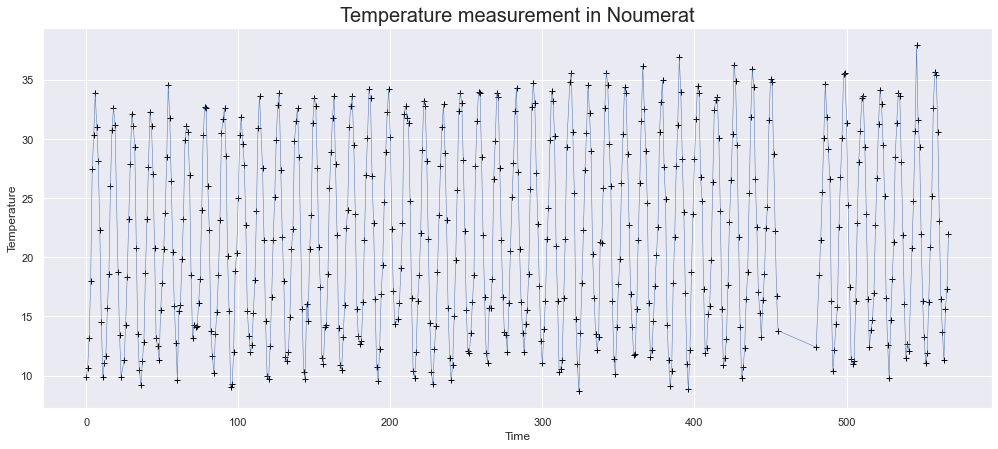

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


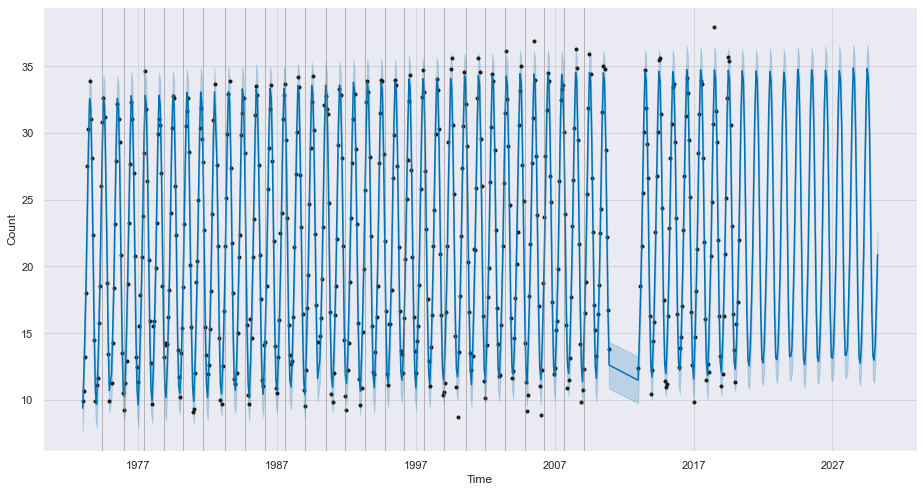

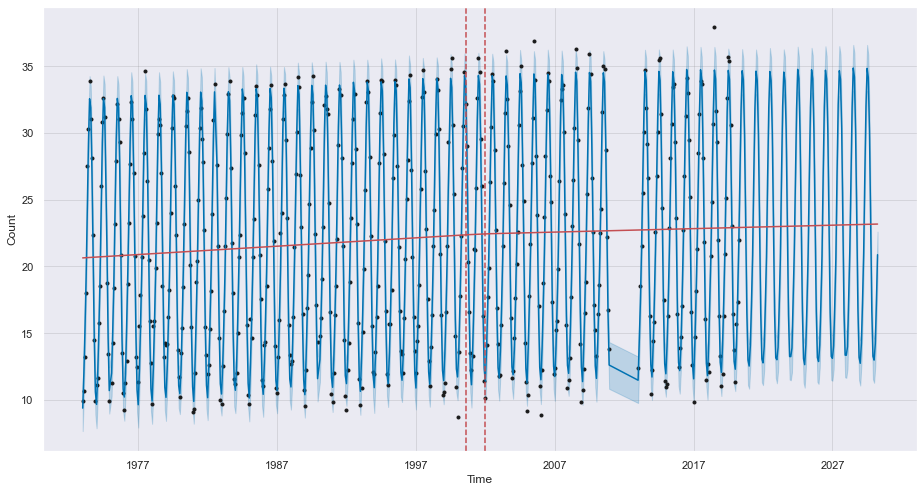

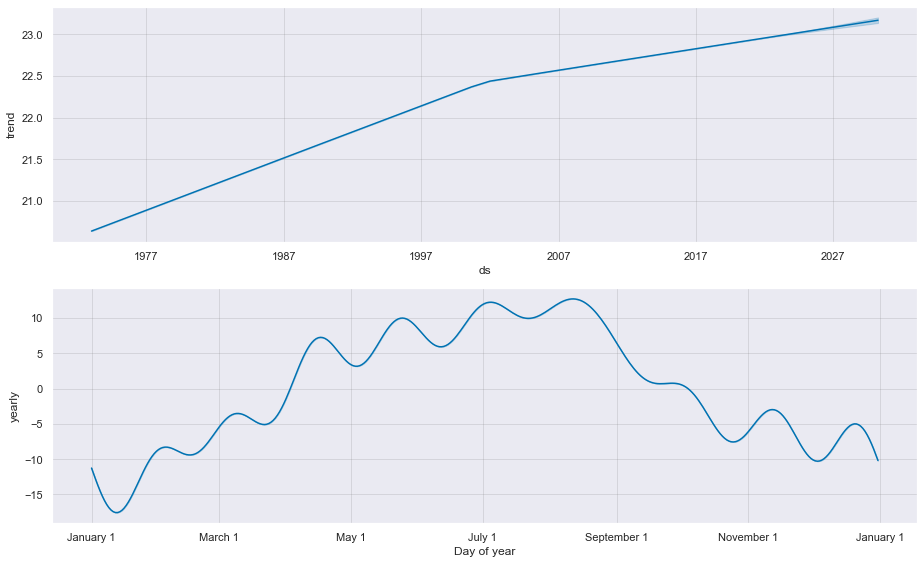

In [334]:
forecast('Noumerat', 120)

In [343]:
record = []
for station_name in stations['Station Name']:
    code = stations[stations['Station Name'] == station_name].ID.values[0]
    # Change the local address to extract the data for each station
    station = pd.read_csv('C:/Users/Taha/Desktop/nasa_algeria_temp/'+str(code)+'.csv')
    dates = []
    for i in station.YEAR:
        for j in range(1, 13):
            dates.append(str(i) + '-' + str(j))
    
    final_data = pd.DataFrame(dates)
    final_data['y'] = station.values[:,1:13].reshape(1, len(dates)).flatten()
    final_data.columns = ['ds','y']
    final_data = final_data[final_data.y < 100]
    model_temp = Prophet()
    model_temp.set_auto_seasonalities
    model_temp.fit(final_data);
    future_temp = model_temp.make_future_dataframe(periods=0, freq='M')
    forecast_temp = model_temp.predict(future_temp)
    record.append([list(forecast_temp.ds), list(forecast_temp.trend)])
    print('Added: ', station_name)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Bordj Badj Mokhtar


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Tamanrasset


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Tiska


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Illizi Takhamalt


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  In Salah


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Touat Cheikh Sidi Mohamed Bel


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Tindouf


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Timimoun


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Beni Abbes


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  El Golea


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Bechar


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Oued Irara


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Ouargla


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Noumerat


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Sidi Mahdi


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Guemar


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Naama


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Mecheria


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  El Bayadh


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Laghouat


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  El Kheiter


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Djelfa Tletsi


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Biskra


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Saida


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Ghriss


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Mostaganem


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Arzew


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Es Senia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Beni Saf


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Zenata


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Maghnia


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Ksar Chellala


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Bou Chekif


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Ech Cheliff


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Miliana


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Medea


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Ain Bessam


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Alger Dar El Beida


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Bou Saada


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  M'Sila


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Bordj Bou Arreridj


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Setif Ain Arnat


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Soummam


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Jijel


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Batna


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Mohamed Boudiaf Intl


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Khenchella


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Cheikh Larbi Tebessi


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Oum El Bouaghi


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Guelma


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Added:  Souk Ahras
Added:  Annaba


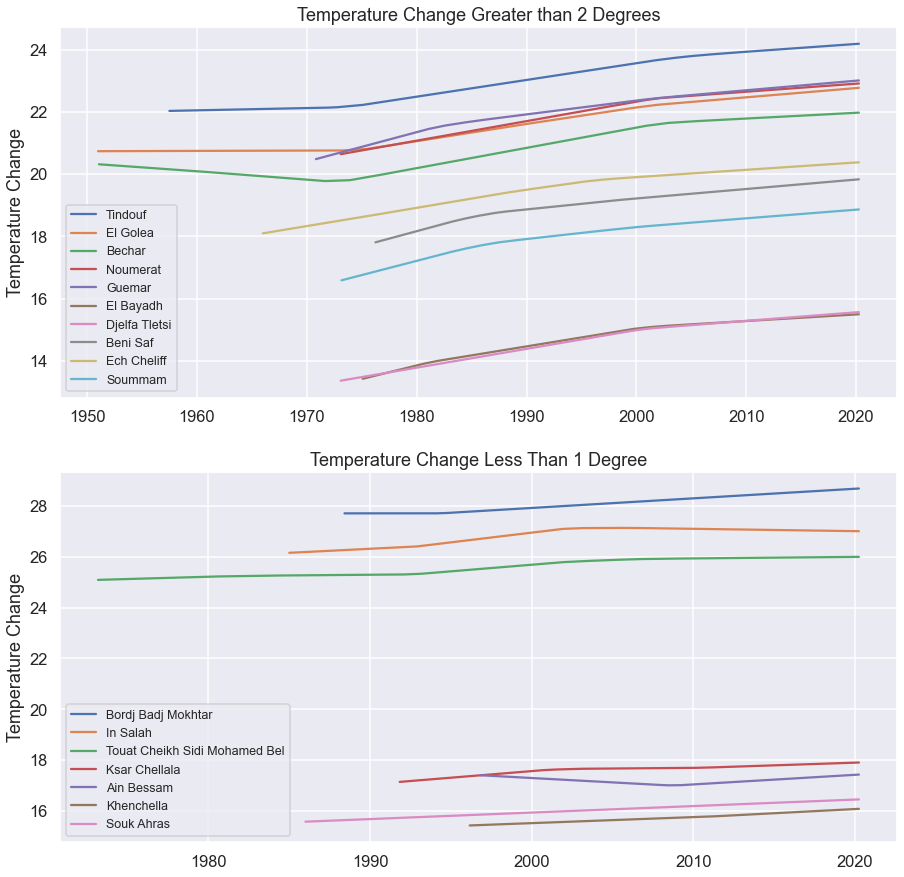

In [543]:
sns.set_style('darkgrid'); sns.set_context('talk')

temp_change = []

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
for idx,i in enumerate(record):
    cache = pd.DataFrame(i[0][1:], columns=['time'])
    cache['change'] = np.diff(i[1])
    cache['value'] = i[1][1:]
    cache = cache[cache.time > datetime.datetime(1950, 1, 1)]
    temp_change.append((max(cache.value) - min(cache.value)))
    if (max(cache.value) - min(cache.value)) > 2: 
        plt.plot(cache.time, cache.value, label=stations['Station Name'][idx])
plt.ylabel('Temperature Change')
plt.title('Temperature Change Greater than 2 Degrees')
plt.legend(loc=3, fontsize='x-small')

plt.subplot(2, 1, 2)
for idx,i in enumerate(record):
    cache = pd.DataFrame(i[0][1:], columns=['time'])
    cache['change'] = np.diff(i[1])
    cache['value'] = i[1][1:]
    cache = cache[cache.time > datetime.datetime(1950, 1, 1)]
    
    if (max(cache.value) - min(cache.value)) < 1: 
        plt.plot(cache.time, cache.value, label=stations['Station Name'][idx])
plt.ylabel('Temperature Change')
plt.title('Temperature Change Less Than 1 Degree')
plt.legend(loc=3, fontsize='x-small'); plt.show()

In [620]:
for idx,node in enumerate(graph.nodes):
    graph.nodes[node]['temp_change'] = temp_change[idx]

import mplleaflet
plt.figure(figsize=(10, 10))
fig = nx.draw(graph, pos = stations['centroid'], node_size = 200, cmap='coolwarm',
              node_color=[graph.nodes[i]['temp_change'] for i in graph.nodes],
              edgecolors='black', linewidths=.5)
mplleaflet.display(fig=fig, tiles=(html))